# Conexión a BigQuery

In [1]:
import json
import os
from google.oauth2 import service_account
from google.cloud import bigquery

# Instanciar credenciales
bq_credentials = service_account.Credentials.from_service_account_info(
    json.loads(os.environ['GOOGLEYELP_SERVICE_ACCOUNT']))


client = bigquery.Client(credentials=bq_credentials, 
    project=bq_credentials.project_id)

# Importar librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Google

## Metadata

In [3]:
sql_query = ('''SELECT *
                FROM pg-yelp-gmaps-389415.GoogleMaps.metadata
                ''')

df_meta = client.query(sql_query).to_dataframe()

In [4]:
df_meta.drop('latitude', axis=1, inplace=True)
df_meta.drop('longitude', axis=1, inplace=True)
df_meta.head()

,local_name,gmap_id,avg_rating,num_of_reviews,rest_category,abierto,service,comment_2019,comment_2021,state
0,Starbucks,0x8644b16dba7f4f4f:0x9e519e2173055abc,1.3,33,Bar,Todos los días,"Takeout, Delivery",0.0,1.0,TX
1,KFC,0x8647331bc4fbbf4b:0x2dc354d80bf72196,1.3,16,Fast food,Todos los días,"Takeout, Delivery",0.0,0.0,TX
2,Chipotle Mexican Grill,0x864c39bde62346d9:0x453a1f935bfe7651,1.4,48,Fast food,Todos los días,"Takeout, Delivery",0.0,1.0,TX
3,Sharks Cage,0x808fcbc064c30e7f:0xb193a79e545690c5,1.5,48,Bar,Todos los días,None,1.0,0.0,CA
4,IHOP,0x89d9f22c0cfb3c33:0x7c417dac416582c7,1.5,73,Desayuno,Todos los días,Delivery,0.0,0.0,NY


In [5]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43381 entries, 0 to 43380
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   local_name      43381 non-null  object 
 1   gmap_id         43381 non-null  object 
 2   avg_rating      43381 non-null  object 
 3   num_of_reviews  43381 non-null  object 
 4   rest_category   43381 non-null  object 
 5   abierto         40998 non-null  object 
 6   service         41742 non-null  object 
 7   comment_2019    43381 non-null  float64
 8   comment_2021    43381 non-null  float64
 9   state           43381 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.3+ MB


In [6]:
df_meta['avg_rating'] = pd.to_numeric(df_meta['avg_rating'])

## Reviews

In [7]:
sql_query = ('''SELECT *
                FROM pg-yelp-gmaps-389415.GoogleMaps.reviews
                ''')

df_reviews = client.query(sql_query).to_dataframe()

In [8]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_reviews.head()

,date,rating,opinion,gmap_id,feeling,opinion_length
0,2020-11-17,1,What’s the point of the staff asking you if yo...,0x80c29ba25ad2aa29:0x14f8b8ccaa60be71,Neutral,1
1,2019-04-06,1,I didn't go to Starbucks so quit sending me th...,0x809ad92b2f2f267f:0xdfec2dc88a0b8475,Neutral,1
2,2019-06-28,1,Too pricey not pictures,0x809ad92b2f2f267f:0xdfec2dc88a0b8475,Neutral,0
3,2019-03-16,3,Kinda pricey,0x80dcd7c31e793301:0x50dd0e8b33f0efbf,Neutral,0
4,2019-06-18,3,Giod pizza but Pricey!,0x80c1ffbae2279c55:0x7a3c439b18a89a4b,Neutral,0


In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913977 entries, 0 to 3913976
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   rating          object        
 2   opinion         object        
 3   gmap_id         object        
 4   feeling         object        
 5   opinion_length  Int64         
dtypes: Int64(1), datetime64[ns](1), object(4)
memory usage: 182.9+ MB


## **Analisis de la tabla "metadata google."**

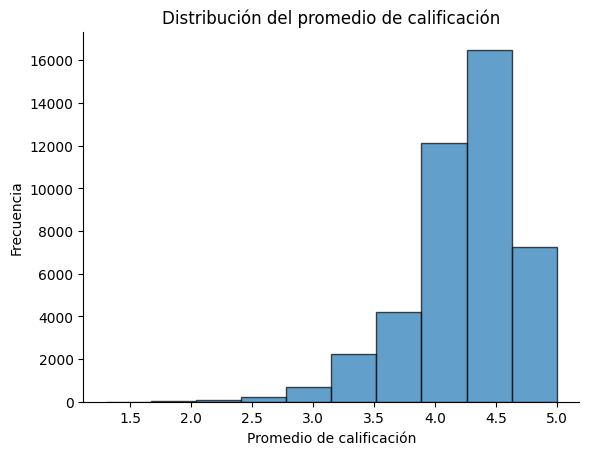

In [10]:
# Visualización del promedio de calificación (avg_rating)
plt.hist(df_meta['avg_rating'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Promedio de calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución del promedio de calificación')

# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Eliminar bordes del gráfico
sns.despine()

# Mostrar el gráfico
plt.show()

**Una observación bastante clara es el hecho de que la gran mayoría de los registros se concentran en las calificaciones más positivas. Tal como vimos en el análisis de los datos de la plataforma Yelp, no encontramos una crisis o un alto porcentaje de descontento entre los usuarios. Esto indica que en general, los usuarios están satisfechos con sus experiencias y tienden a dejar reseñas positivas en la amplia mayoria de los casos.**

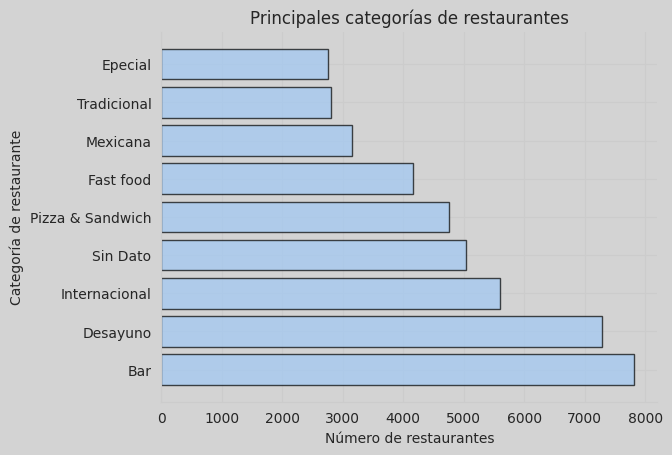

In [11]:
# Visualización de las categorías de restaurantes (rest_category)
rest_category_counts = df_meta['rest_category'].value_counts().head(10)

# Ordenar de mayor a menor
rest_category_counts = rest_category_counts.sort_values(ascending=False)

plt.barh(rest_category_counts.index, rest_category_counts.values, edgecolor='k', alpha=0.7)
plt.xlabel('Número de restaurantes')
plt.ylabel('Categoría de restaurante')
plt.title('Principales categorías de restaurantes')

# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Eliminar bordes del gráfico
sns.despine()

# Mostrar el gráfico
plt.show()

**Al igual que en los datos de la plataforma Yelp, volvemos a encontrarnos con el hecho de que la mayor cantidad de restaurantes contenidos dentro del dataset son bares, seguidos por restaurantes para desayunos. Completando el top 3, se encuentran los restaurantes de comida internacional. Esta distribución refleja la prevalencia de estos tipos de restaurantes en el dataset y podría ser indicativo de la popularidad o disponibilidad de estos establecimientos en el área cubierta (en este caso los 5 estados elegidos para el estudio) por los datos.**

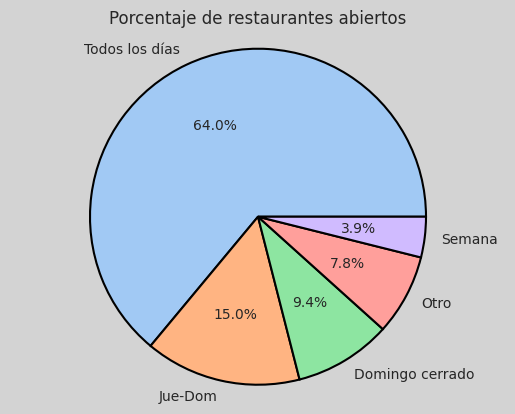

In [12]:
# Visualización de la cantidad de restaurantes abiertos (abierto)
abierto_counts = df_meta['abierto'].value_counts()

# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Gráfico de pastel utilizando Seaborn
plt.pie(abierto_counts.values, labels=abierto_counts.index, autopct='%1.1f%%', colors=sns.color_palette(),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Configurar título del gráfico
plt.title('Porcentaje de restaurantes abiertos')

# Hacer el gráfico de pastel circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

**Este gráfico nos permite visualizar de manera correcta las proporciones de disponibilidad que ofrecen los restaurantes contenidos en el dataset. El rango de atención más amplio, "Todos los días", es el más común y se presenta en la mayor proporción. Le sigue en una proporción menor los restaurantes que abren de jueves a domingo. Los restaurantes que solo abren entre semana, de lunes a viernes, son los menos presentes dentro del dataset. Es importante destacar que el 10.6% representado como "otros" hace referencia a cualquier otro rango de apertura y atención que no corresponde a los especificados en el gráfico.**

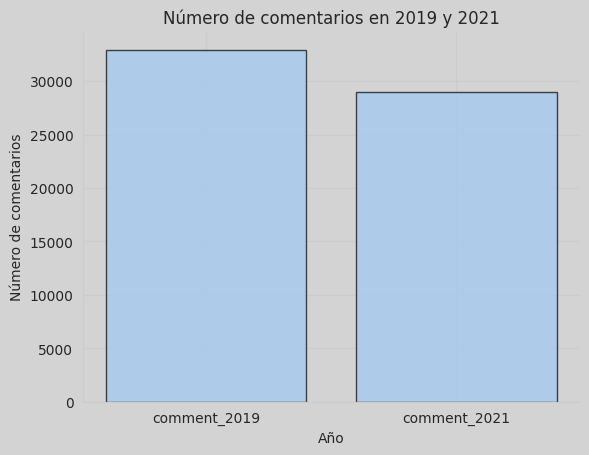

In [13]:
comment_counts = df_meta[['comment_2019', 'comment_2021']].sum()
plt.bar(comment_counts.index, comment_counts.values, edgecolor='k', alpha=0.7)
plt.xlabel('Año')
plt.ylabel('Número de comentarios')
plt.title('Número de comentarios en 2019 y 2021')

# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Eliminar bordes del gráfico
sns.despine()

# Mostrar el gráfico
plt.show()

**Este es un análisis bastante hipotético. En el gráfico, podemos observar la cantidad de restaurantes que recibieron al menos un comentario durante el año 2019 y durante el año 2021. Se aprecia una disminución significativa en la cantidad de restaurantes que continuaron abiertos y recibiendo comentarios en el año 2021 en comparación con el año 2019. Suponemos que la pandemia por COVID-19 podría haber sido un factor determinante para esta disminución. Sin embargo, debido a la falta de información adicional, este análisis se queda en el campo de lo hipotético y no podemos afirmar con certeza las causas exactas de esta disminución.**

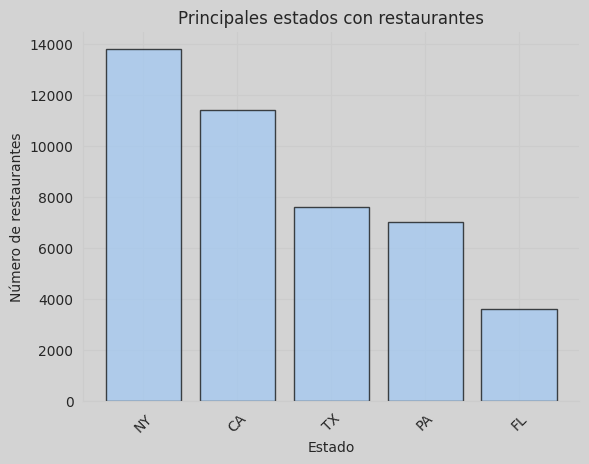

In [14]:
# Visualización del estado de los restaurantes (state)
state_counts = df_meta['state'].value_counts().head(10)
plt.bar(state_counts.index, state_counts.values, edgecolor='k', alpha=0.7)
plt.xlabel('Estado')
plt.ylabel('Número de restaurantes')
plt.title('Principales estados con restaurantes')

# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Eliminar bordes del gráfico
sns.despine()

# Rotar etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

**Este es un análisis simple de la cantidad de restaurantes en cada estado. Es curioso observar que Texas es aproximadamente 12.76 veces más grande que Nueva York en términos de área, y sin embargo, posee casi la mitad de la cantidad de restaurantes en comparación con Nueva York. Esto puede deberse a diversos factores, como la densidad de población, preferencias culinarias, estructura urbana o incluso políticas comerciales. Sería interesante explorar más a fondo las razones detrás de esta disparidad en la cantidad de restaurantes entre los dos estados, pero por falta de informacion lastimosamente no es posible.**

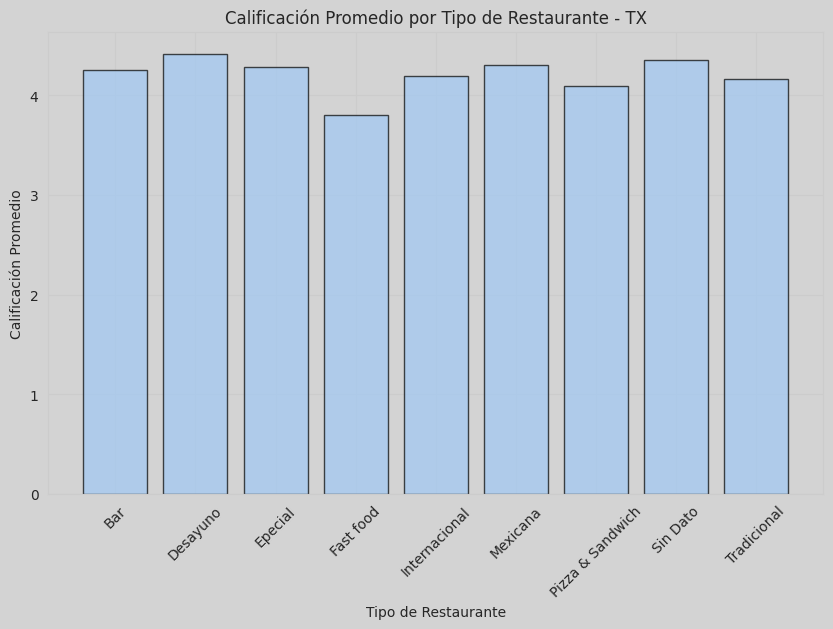

<Figure size 640x480 with 0 Axes>

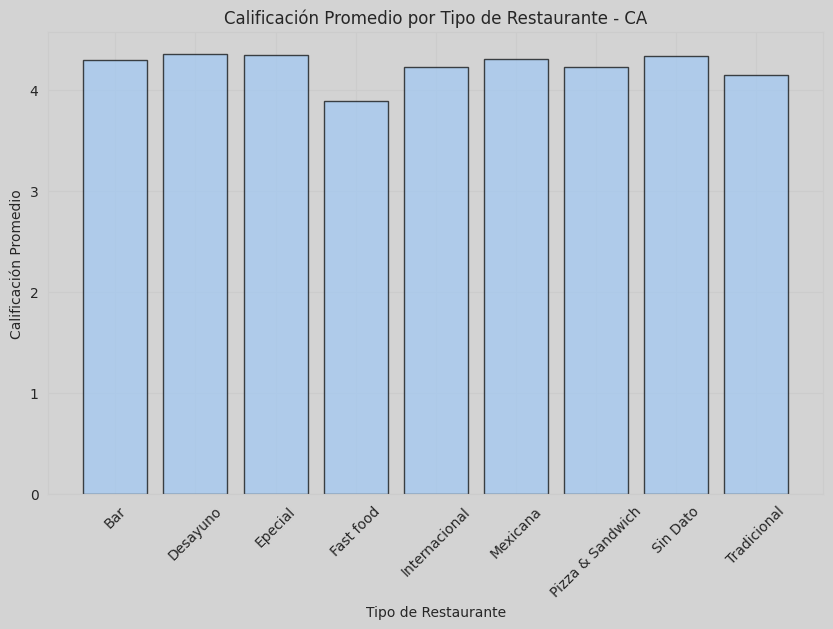

<Figure size 640x480 with 0 Axes>

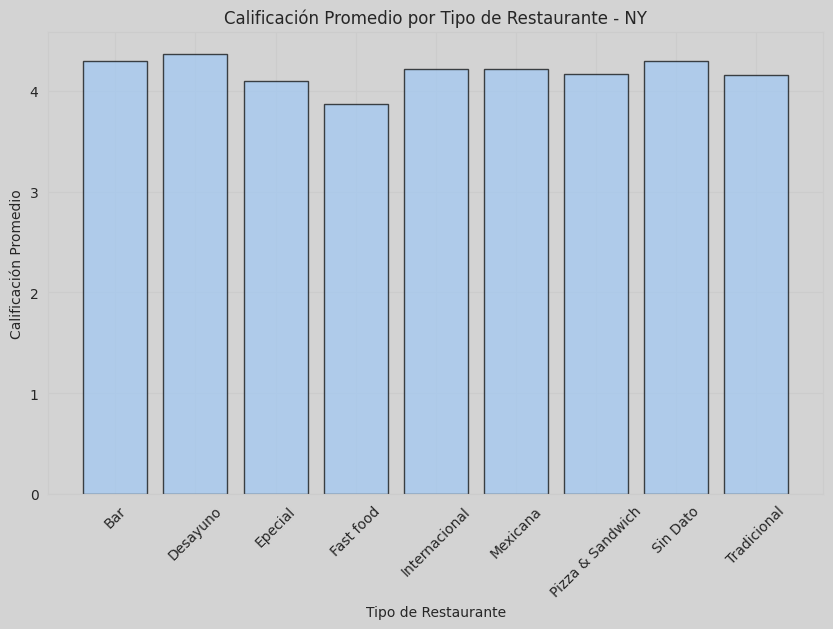

<Figure size 640x480 with 0 Axes>

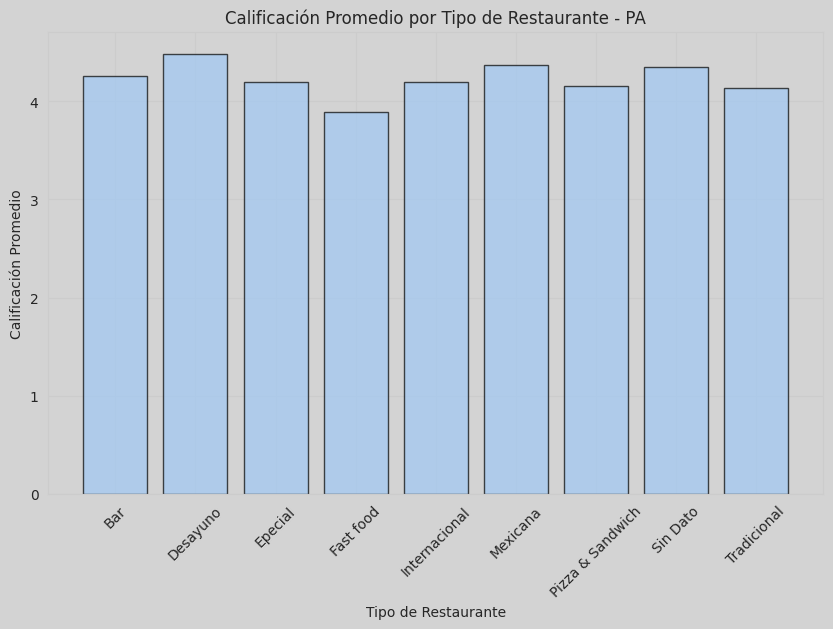

<Figure size 640x480 with 0 Axes>

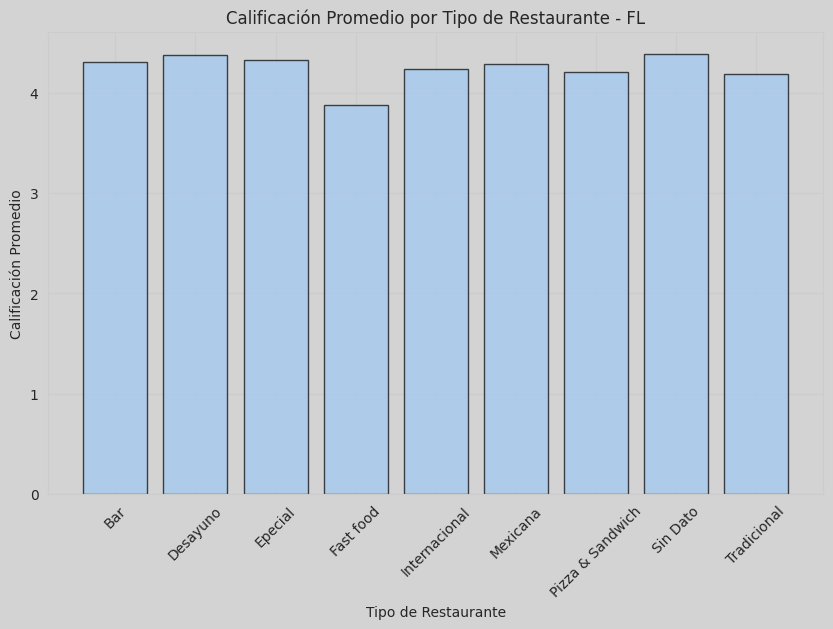

<Figure size 640x480 with 0 Axes>

In [15]:
# Obtener la lista de estados únicos en el DataFrame
estados = df_meta['state'].unique()

# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Iterar sobre cada estado y generar el gráfico correspondiente
for estado in estados:
    # Filtrar el DataFrame por el estado actual
    df_estado = df_meta[df_meta['state'] == estado]
    
    # Calcular la calificación promedio por tipo de restaurante en el estado actual
    avg_rating_by_category = df_estado.groupby('rest_category')['avg_rating'].mean()
    
    # Crear el gráfico de barras para la calificación promedio por tipo de restaurante
    plt.figure(figsize=(10, 6))
    plt.bar(avg_rating_by_category.index, avg_rating_by_category.values, edgecolor='k', alpha=0.7)
    plt.xlabel('Tipo de Restaurante')
    plt.ylabel('Calificación Promedio')
    plt.title(f'Calificación Promedio por Tipo de Restaurante - {estado}')
    plt.xticks(rotation=45)
    plt.show()
    plt.clf()  # Limpiar la figura actual antes de pasar al siguiente estado


**En este caso, podemos notar algo bastante curioso que se complementa con lo observado en el análisis de los datos de Yelp. Más allá de notar que no existe una crisis de calificaciones negativas en ninguno de los casos, ya que en promedio todos los tipos de restaurantes en los cinco estados se mantienen por encima de las 3 estrellas, también hemos notado que, en promedio, el tipo de restaurante con menor cantidad de comentarios es el de comidas rápidas. Sin embargo, aunque la diferencia sea mínima, también es el tipo de restaurante que, en promedio, tiene peores calificaciones. Esto puede ser un indicio interesante para investigar las posibles razones detrás de estas calificaciones promedio más bajas para los restaurantes de comidas rápidas en comparación con otros tipos de establecimientos.**

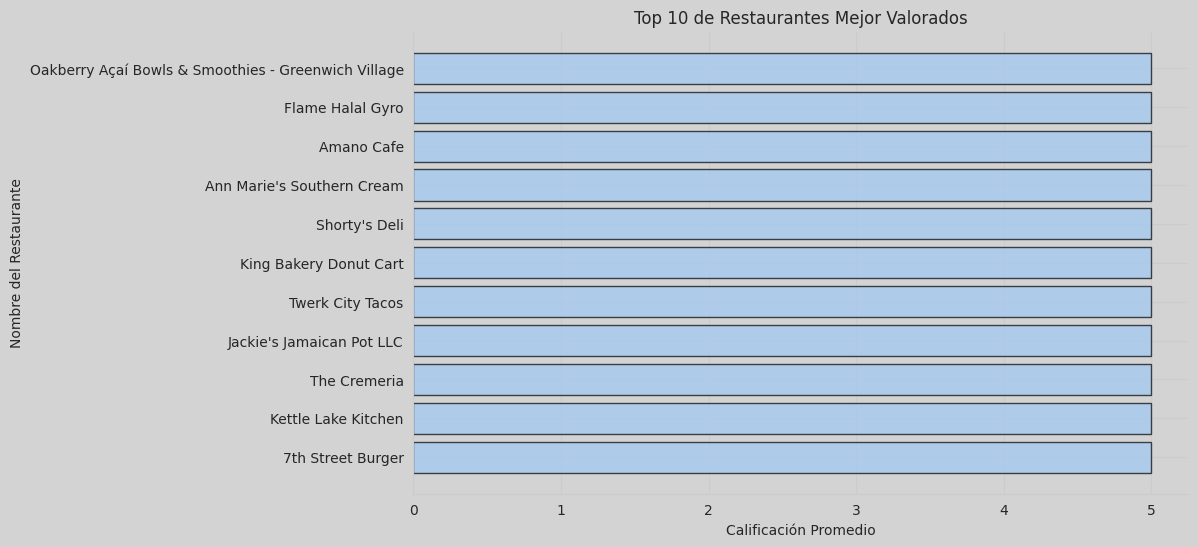

In [16]:
df_top10 = df_meta[['local_name', 'avg_rating', 'num_of_reviews']].copy()
df_top10 = df_top10.sort_values(by=['avg_rating', 'num_of_reviews'], ascending=[False, False])
top10_restaurants = df_top10.head(11)

# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

plt.figure(figsize=(10, 6))
plt.barh(top10_restaurants['local_name'], top10_restaurants['avg_rating'], edgecolor='k', alpha=0.7)
plt.xlabel('Calificación Promedio')
plt.ylabel('Nombre del Restaurante')
plt.title('Top 10 de Restaurantes Mejor Valorados')
plt.gca().invert_yaxis()

# Eliminar bordes del gráfico
sns.despine()

plt.show()

**Este grafico presenta el top 10 de los restaurantes mejor valorados por el público, junto con su calificación promedio.**

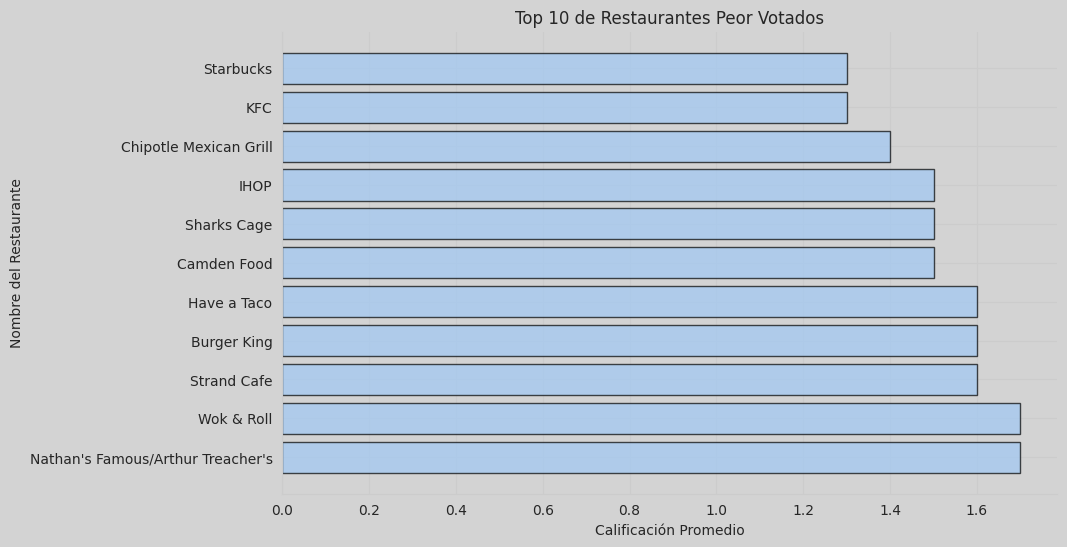

In [17]:
df_bottom10 = df_meta[['local_name', 'avg_rating', 'num_of_reviews']].copy()
df_bottom10 = df_bottom10.sort_values(by=['avg_rating', 'num_of_reviews'], ascending=[True, False])
bottom10_restaurants = df_bottom10.head(11)

# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

plt.figure(figsize=(10, 6))
plt.barh(bottom10_restaurants['local_name'], bottom10_restaurants['avg_rating'], edgecolor='k', alpha=0.7)
plt.xlabel('Calificación Promedio')
plt.ylabel('Nombre del Restaurante')
plt.title('Top 10 de Restaurantes Peor Votados')
plt.gca().invert_yaxis()

# Eliminar bordes del gráfico
sns.despine()

plt.show()

**Y por ultimo este grafico presenta el top 10 de los restaurantes peor valorados por el público, junto con su calificación promedio.**

## **Analisis de la tabla "reviews_google."**

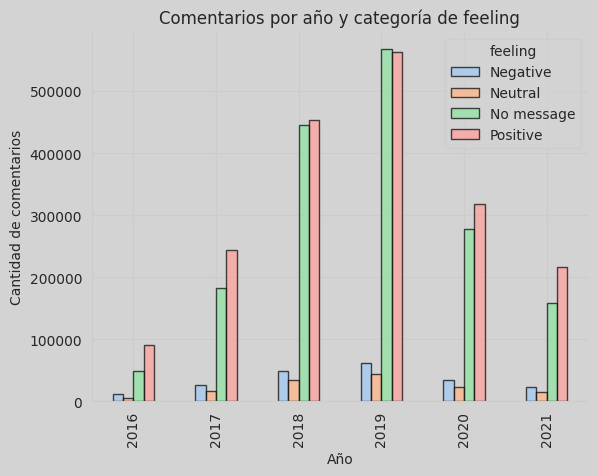

In [18]:
# Extraemos el año de la columna 'date'
df_reviews['year'] = df_reviews['date'].dt.year

# Contamos la cantidad de valores positivos, neutrales y negativos en la columna 'feeling' por año
feeling_counts = df_reviews.groupby(['year', 'feeling'])['feeling'].count().unstack()

# Estilo de Seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_style({"axes.facecolor": "lightgray", "figure.facecolor": "lightgray"})

# Creamos el gráfico de barras
feeling_counts.plot(kind='bar', edgecolor='k', alpha=0.7)

# Configuramos las etiquetas del eje x y el título del gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de comentarios')
plt.title('Comentarios por año y categoría de feeling')

# Eliminar bordes del gráfico
sns.despine()

# Mostramos el gráfico
plt.show()

**Este análisis muestra la distribución de los sentimientos expresados por los usuarios a lo largo de los años dentro del dataset. En general, se observa que aunque la neutralidad siempre está presente, los usuarios tienden más a expresarse de manera positiva o negativa en lugar de neutral. También se puede visualizar claramente el volumen de usuarios que al momento de calificar no expresan un comentario. Por último, se puede observar un pico en el año 2019, que fue el año en el que se realizaron la mayor cantidad de reseñas, tanto positivas como en general.**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ca2c531-2c35-4d05-9a2b-e87fc781f84f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>